# Diabetes health indicators analysis

In this work, we analyze a dataset containing various health indicators related to diabetes. The goal is to identify patterns and correlations that may help in understanding the factors contributing to diabetes.

Contents
- EDA
- Data processing (encoding, scaling, IQR, nulls, feature reduction, etc)
- Clustering


EDA
- Basic overview (dataset shape and dimension, columns names and data types, first and last rows, memory usage)
- Data quality
  - mising values
  - duplicate row check
  - Data tyype validation
- Target Variable analysis
  - distribution of diagnosed diabetes
  - Count/percentage of each class
- Numerical features
  - Summary statistics (mean, median, mode, min, max)
  - Distribution plits for each numerical feature
  - Box plots to identify outliers
  - Correlation matrix/heatmap
- Categorical features
  - Value counts for each categorical variable
  - Bar plots showing category distributions
  - Cross-tabulation with traget variable
- Relationships
  - Correlation with target variable
  - Feature vs target visualization (diabetes vs non-diabetes group
  - Pairwise relationships between key features
  - Group statistics by diabetes status
- Outlier Detection
  - IQR method for numerical features
  - Visualization (box plots, scatter plots)

data processing
- Handling missing values (imputation, removal)
- check for and remove duplicate rows
- detect outliers using IQR method or Z-score
- Remove, cap(winsorize) or keep
- DOcument which features have outliers
- Encoding categorical variables (one-hot, label encoding for ordinal features), binary if needed
- Standard Scaler for normally distributed features
- Robust Scaler for features with outliers
- MixMaxScaler if bounded range needed
- Apply train-test split

Feature engineering
- create interaction features
- Polynomial features if relationships are non-linear
- domain-specific features (e.g. BMI categories, age groups)

Feature Selection/Reduction
- Remove low varaince features
- COrrelation analysis (remove highly correlated features
- Feature importance from models
- PCA or other dimensionality reduction 
  
CLass imbalance
- Check if target is balanced
- SMOTE, undersampling, or class weights if needed

Split via train-test split (stratification if imbalanced)
validation set or cross-validation strategy



## Split the data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd


dataset_file = "diabetes_dataset.csv"
dataset = pd.read_csv(dataset_file)

X = dataset.drop(columns=["diagnosed_diabetes"])
y = dataset["diagnosed_diabetes"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100000, 30)
y shape: (100000,)


In [28]:
# Check for any null values in the dataset
print("Counting null values in each column .....\n")
cols = dataset.columns
for col in cols:
    null_count = dataset[col].isnull().sum()
    print(f"{col:40}    {null_count}")


Counting null values in each column .....

age                                         0
gender                                      0
ethnicity                                   0
education_level                             0
income_level                                0
employment_status                           0
smoking_status                              0
alcohol_consumption_per_week                0
physical_activity_minutes_per_week          0
diet_score                                  0
sleep_hours_per_day                         0
screen_time_hours_per_day                   0
family_history_diabetes                     0
hypertension_history                        0
cardiovascular_history                      0
bmi                                         0
waist_to_hip_ratio                          0
systolic_bp                                 0
diastolic_bp                                0
heart_rate                                  0
cholesterol_total                    

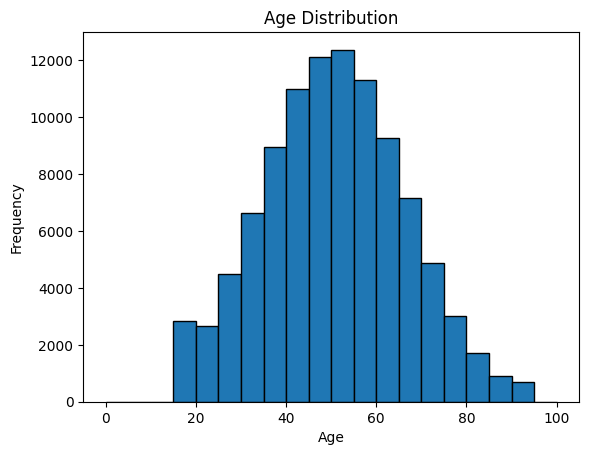

In [32]:
# Distribution of age
import matplotlib.pyplot as plt
plt.hist(dataset["age"], bins=20, edgecolor='black', range=(0, 100))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

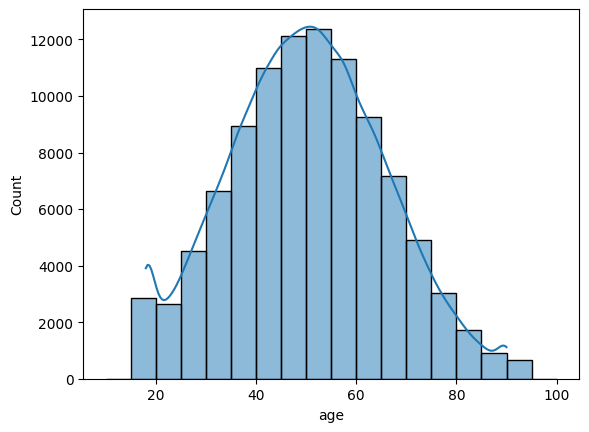

In [43]:
import seaborn as sns

sns.histplot(dataset, x="age", bins=18, edgecolor='black', binrange=(10, 100), kde=True)

In [51]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
scaled_data = rs.fit_transform(dataset)



# sns.histplot(scaled_data, x="age", bins=18, edgecolor='black', binrange=(10, 100), kde=True)

ValueError: could not convert string to float: 'Male'

In [49]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Sample data with outliers (e.g., a list of feature values)
data = np.array([[10], [20], [30], [40], [50], [1000]])

# 1. Create the scaler object
scaler = RobustScaler()

# 2. Fit the scaler to the data and transform the data
# The median and IQR are computed from the 'data' and stored internally
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)

# 3. Transform new/test data using the same median and IQR
test_data = np.array([[60], [70]])
scaled_test_data = scaler.transform(test_data)
print("Scaled Test Data:\n", scaled_test_data)

Original Data:
 [[  10]
 [  20]
 [  30]
 [  40]
 [  50]
 [1000]]
Scaled Data:
 [[-1. ]
 [-0.6]
 [-0.2]
 [ 0.2]
 [ 0.6]
 [38.6]]
Scaled Test Data:
 [[1. ]
 [1.4]]
